1)  En un notebook de jupyter desarrolle los siguientes pasos


Descargue el JSON con la lista de paises: https://gist.githubusercontent.com/keeguon/2310008/raw/bdc2ce1c1e3f28f9cab5b4393c7549f38361be4e/countries.json y escoja aleatoriamente un país

In [248]:
import requests, json, random
import numpy as np
a = np.random.randint(50) #Escoge el número (aleatorio) del país asignado

url = requests.get("https://api.worldbank.org/v2/country?format=json") #importamos el archivo url
text = url.text

data = json.loads(text) #Convertimos los datos a cadena

Countries = data[1]
Country = Countries[a]

print(Country['name'])


Australia


Use el API de institutions para extraer la lista de instituciones del país, por ejemplo: colombia

In [ ]:
url1 = requests.get("https://inspirehep.net/api/institutions?=colombia")
response = url1

data = response.json().get('hits').get('hits')

for i in data:
  if i.get("metadata").get("number_of_papers") > 0:
    legacy = i.get("metadata").get("legacy_ICN")
    print(legacy)
    break
  print('Ninguna tiene papers')


 Con el API de literatura obtenga el JSON con los artículos de menos de 10 autores usando el "legacy_ICN".
 
 Para al menos un artículo de esa institución, extraiga el URL del perfil de cada autor de esa institución que se encuentra dentro del campo "authors" en "record" y luego en "$ref"

In [251]:
url2 = requests.get("https://inspirehep.net/api/literature?sort=mostrecent&page=1&q=aff+Colombia,+U.+Natl.+and+ac+1->+10")
response = url2


data2 = response.json().get('hits').get('hits')
n1=4 #ejemplo
n2=8 #ejemplo


ap1 = data2[n1].get("metadata").get("authors")
ap2 = data2[n2].get("metadata").get("authors")
A = ap1+ap2


Aref = []
for i in A:
  Aref.append(i.get("record").get("$ref"))

print(Aref)


['https://inspirehep.net/api/authors/1964576', 'https://inspirehep.net/api/authors/1985776', 'https://inspirehep.net/api/authors/1964574', 'https://inspirehep.net/api/authors/1010841', 'https://inspirehep.net/api/authors/1027695', 'https://inspirehep.net/api/authors/991621', 'https://inspirehep.net/api/authors/2061384', 'https://inspirehep.net/api/authors/1275278']


Con cada uno de los datos del resultado del API para cada perfil construya una tabla con los siguientes columnas (puede que alguno de los datos no esté disponible)

In [252]:
Tabla = []

for ref in Aref:
  response = requests.get(ref)
  autor = response.json()

  name = autor.get("metadata").get("name").get("value")
  email = author.get("metadata").get("email_adresses")

  autor_append = {"Nombre": name}
  Tabla.append(autor_append)



pd.DataFrame(Tabla)

,Nombre
0,"Vargas-Calderón, Vladimir"
1,"Vinck-Posada, Herbert"
2,"González, Fabio A."
3,"Elizalde, Emilio"
4,"Izaurieta, Fernando"
5,"Riveros, Carlos"
6,"Salgado, G."
7,"Valdivia, Omar"


2)

a) Genere un polinomio de numpy con 3 raices reales aleatorias entre los dos últimos números diferentes de su identificación

In [22]:
import numpy as np

a = np.random.rand()
b = np.random.rand()
c = np.random.rand()
print(a, b, c)

np.roots([a,b,c])

0.43532739505232876 0.07537582649212127 0.17604771329039814


array([-0.08657372+0.63000636j, -0.08657372-0.63000636j])

In [290]:
import scipy as sp
a = np.random.rand()
b = np.random.rand()
c = np.random.rand()

polinomio = [a,b,c]

x = sp.arange(-4,2,.05)
y = sp.polyval(polinomio,x)

raices = sp.roots(polinomio)
s = sp.polyval(polinomio,raices)

print(raices)

[-0.16353312+1.03354413j -0.16353312-1.03354413j]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: scipy.polyval is deprecated and will be removed in SciPy 2.0.0, use numpy.polyval instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: scipy.roots is deprecated and will be removed in SciPy 2.0.0, use numpy.roots instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: scipy.polyval is deprecated and will be removed in SciPy 2.0.0, use numpy.polyval instead
  if sys.path[0] == '':


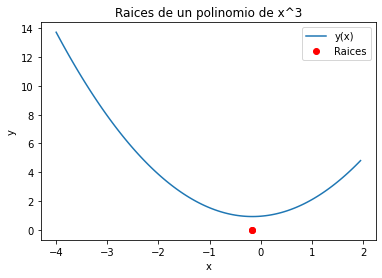

In [291]:
import matplotlib.pyplot as plt
plt.plot(x, y, label='y(x)')

plt.plot(raices.real,s.real,'ro', label = 'Raices')
# Etiquetas 
plt.xlabel('x')
plt.ylabel('y')
plt.title('Raices de un polinomio de x^3')
# Leyenda
plt.legend()
# Mostramos la figura en pantalla
plt.show()